<a href="https://colab.research.google.com/github/anggerharyo/News-Article-Category-Classification_Kelompok-3/blob/main/Kelompok_3_News_Article_Category_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Untuk menghitung TF-IDF
from sklearn import preprocessing # Untuk mengubah label menjadi angka
import pandas as pd # Untuk membaca data
from sklearn.model_selection import train_test_split # Untuk membagi data menjadi data latih dan data uji
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # Untuk pemrosesan bahasa alami
from nltk.corpus import stopwords # Untuk menghapus kata-kata yang tidak penting
from nltk.stem import WordNetLemmatizer # Untuk mengubah kata ke bentuk dasar
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report # Untuk mengevaluasi model
import numpy as np # aljabar linear
import pandas as pd # pemrosesan data, CSV file I/O (misalnya pd.read_csv)
import string # untuk operasi string

lemma = WordNetLemmatizer() # Inisialisasi WordNetLemmatizer
# Download data untuk pemrosesan bahasa alami
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Mounted at /content/drive/
/content/drive/MyDrive


# **Load Datasets**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/news-article-categories.gsheet') # Membaca file CSV
df = pd.DataFrame(data) # Membuat DataFrame dari data
df.tail(10) # Menampilkan 10 data terakhir

OSError: [Errno 95] Operation not supported: '/content/drive/MyDrive/news-article-categories.gsheet'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Removing NULL Values**

In [ ]:
df.isnull().sum() # Digunakan untuk menghitung jumlah nilai null (NaN) dalam setiap kolom DataFrame df

category    0
title       0
body        5
dtype: int64

In [ ]:
# Digunakan untuk menghapus baris dan kolom dari DataFrame df yang mengandung setidaknya satu nilai null (NaN).
df = df.dropna()
df = df.dropna(axis=1)

In [ ]:
df

,category,title,body
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...
...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural...,I still think about that Tuesday night dinner ...
6873,WOMEN,Happy Birthday To Us,I remember the morning of my high school gradu...
6874,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I aske..."
6875,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa ..."


# **Encoding Category**

In [ ]:
df['category'].value_counts() #  Untuk menghitung jumlah kemunculan setiap nilai unik dalam kolom "category" dari DataFrame df yang berguna untuk melihat distribusi kategori berita dalam data

category
ARTS & CULTURE    1001
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             376
SCIENCE            350
MEDIA              347
CRIME              300
Name: count, dtype: int64

In [ ]:
# Untuk mengonversi nilai kategori dalam kolom "category" menjadi angka
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['category'])
df['label'] = label_encoder.transform(df['category'])

In [ ]:
df

,category,title,body,label
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis...",0
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...,0
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...,0
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds...",0
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...,0
...,...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural...,I still think about that Tuesday night dinner ...,13
6873,WOMEN,Happy Birthday To Us,I remember the morning of my high school gradu...,13
6874,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I aske...",13
6875,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa ...",13


# **Text Preperation**

# **Lower Case**

In [ ]:
# Untuk mengubah semua teks dalam kolom "body" dari DataFrame df menjadi huruf kecil (lowercase)
df['body']=df['body'].str.lower()
df.head()

,category,title,body,label
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"in october 2017, carolyn kramer received a dis...",0
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,this week i talked with actor jeff hiller abou...,0
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,the new yorker is taking on president donald t...,0
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"kellen hickey, a 26-year-old who lives in huds...",0
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,there’s something about combining the traditio...,0


# **Remove HTML Tags**

In [ ]:
# Import modul BeautifulSoup
from bs4 import BeautifulSoup

# Mengecek apakah ada tag html didalam teks

# Mendefinisikan Fungsi 'has_html_tags'
def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags'] = df['body'].apply(has_html_tags)
df.head()

<ipython-input-42-1f9fc603bbc6>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,category,title,body,label,has_html_tags
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"in october 2017, carolyn kramer received a dis...",0,False
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,this week i talked with actor jeff hiller abou...,0,False
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,the new yorker is taking on president donald t...,0,False
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"kellen hickey, a 26-year-old who lives in huds...",0,False
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,there’s something about combining the traditio...,0,False


In [ ]:
count_true = df['has_html_tags'].sum()
count_true # jumlah total baris di mana tag HTML ditemukan dalam DataFrame

0

In [ ]:
df = df.drop(df[df['has_html_tags']].index) # mengembalikan baris-baris di mana tag HTML ditemukan dalam teks pada kolom "body".

In [ ]:
# Untuk menghapus kolom 'has_html_tags' dari DataFrame df
df = df.drop('has_html_tags', axis=1)
df

,category,title,body,label
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"in october 2017, carolyn kramer received a dis...",0
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,this week i talked with actor jeff hiller abou...,0
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,the new yorker is taking on president donald t...,0
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"kellen hickey, a 26-year-old who lives in huds...",0
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,there’s something about combining the traditio...,0
...,...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural...,i still think about that tuesday night dinner ...,13
6873,WOMEN,Happy Birthday To Us,i remember the morning of my high school gradu...,13
6874,WOMEN,The Culture of Love,"my husband, gene, doesn't wear pajamas. i aske...",13
6875,WOMEN,"Carpe Diem, Oprah Style","\nby antonioguillem, via thinkstock\nby lisa ...",13


# **Remove Emojies**

In [ ]:
import regex # Mengimpor modul regex yang digunakan untuk bekerja dengan ekspresi reguler yang mendukung Unicode

# Mendefinisikan Fungsi 'has_emoji'
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['body'].apply(has_emoji)

has_emojis

0       True
1       True
2       True
3       True
4       True
        ... 
6872    True
6873    True
6874    True
6875    True
6876    True
Name: body, Length: 6853, dtype: bool

In [ ]:
has_emojis.sum() #untuk menghitung jumlah nilai True dalam has_emojis

6122

In [ ]:
# Mendefinisikan fungsi remove_emojis
def remove_emojis(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return emoji_pattern.sub('', text)

df['body'] = df['body'].apply(remove_emojis)

In [ ]:
# Untuk mengecek apakah setiap baris dalam kolom "body" yang sudah menggunakan metode apply dari DataFrame df mengandung emoji atau tidak
# (True jika emoji ditemukan, False jika tidak)
has_emojis =  df['body'].apply(has_emoji)
has_emojis

0       False
1       False
2       False
3       False
4       False
        ...  
6872    False
6873    False
6874    False
6875    False
6876    False
Name: body, Length: 6853, dtype: bool

In [ ]:
has_emojis.sum() #untuk menghitung jumlah nilai True dalam has_emojis

0

# **Remove urls**

In [ ]:
import re # Mengimpor modul re yang digunakan untuk bekerja dengan ekspresi reguler (regular expressions) di Python.

# Mendefinisikan fungsi 'remove_url'
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["body"]=df["body"].apply(remove_url)

# **Tokenisasi, Remove punctuation, Remove stopwords**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

def DataPrep(text):
    # Tokenisasi
    tokens = word_tokenize(text)

    # Menghapus tanda baca
    punc = list(punctuation)
    words = [w for w in tokens if w not in punc]

    # Menghapus stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w.lower() not in stop_words]

    # Lematisasi
    lemma = WordNetLemmatizer()
    words = [lemma.lemmatize(w) for w in words]

    text = ' '.join(words)

    return text

# Contoh dataset
dataset = "This is a sample sentence. And here comes another one."

# Tokenisasi tanpa preprocessing
tokens_raw = word_tokenize(dataset)
unique_tokens_raw = set(tokens_raw)
num_unique_raw = len(unique_tokens_raw)

# Tokenisasi setelah preprocessing
preprocessed_text = DataPrep(dataset)
tokens_preprocessed = word_tokenize(preprocessed_text)
unique_tokens_preprocessed = set(tokens_preprocessed)
num_unique_preprocessed = len(unique_tokens_preprocessed)

print("Jumlah token unik sebelum preprocessing:", num_unique_raw)
print("Jumlah token unik setelah preprocessing:", num_unique_preprocessed)


Jumlah token unik sebelum preprocessing: 11
Jumlah token unik setelah preprocessing: 5


# **TF-IDF Vectorizer**

In [ ]:
x = df['body'] = df['body'].apply(DataPrep) # Menggunakan kolom "body" dari dataframe df dan menerapkannya ke fungsi DataPrep menggunakan metode apply.
y = df['label']  # Menggunakan kolom "label" sebagai target

# Vektorisasi teks menggunakan TF-IDF
vectorizer = TfidfVectorizer(stop_words = 'english', max_features=6000)
vectorized_x = vectorizer.fit_transform(x.values.astype('U'))

# **Split**

In [ ]:
# Asumsikan fitur vectorized_x sebagai fitur dan 'y' merupakan vektor label
# Gunakan stratify untuk memastikan bahwa pembagian data dilakukan dengan mempertahankan distribusi kelas yang sama seperti di dataset asli.
x_train, x_test, y_train, y_test = train_test_split(vectorized_x, y, test_size=0.1, stratify=y, random_state=0)

# **Smote**

<ipython-input-56-71fb297e957d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


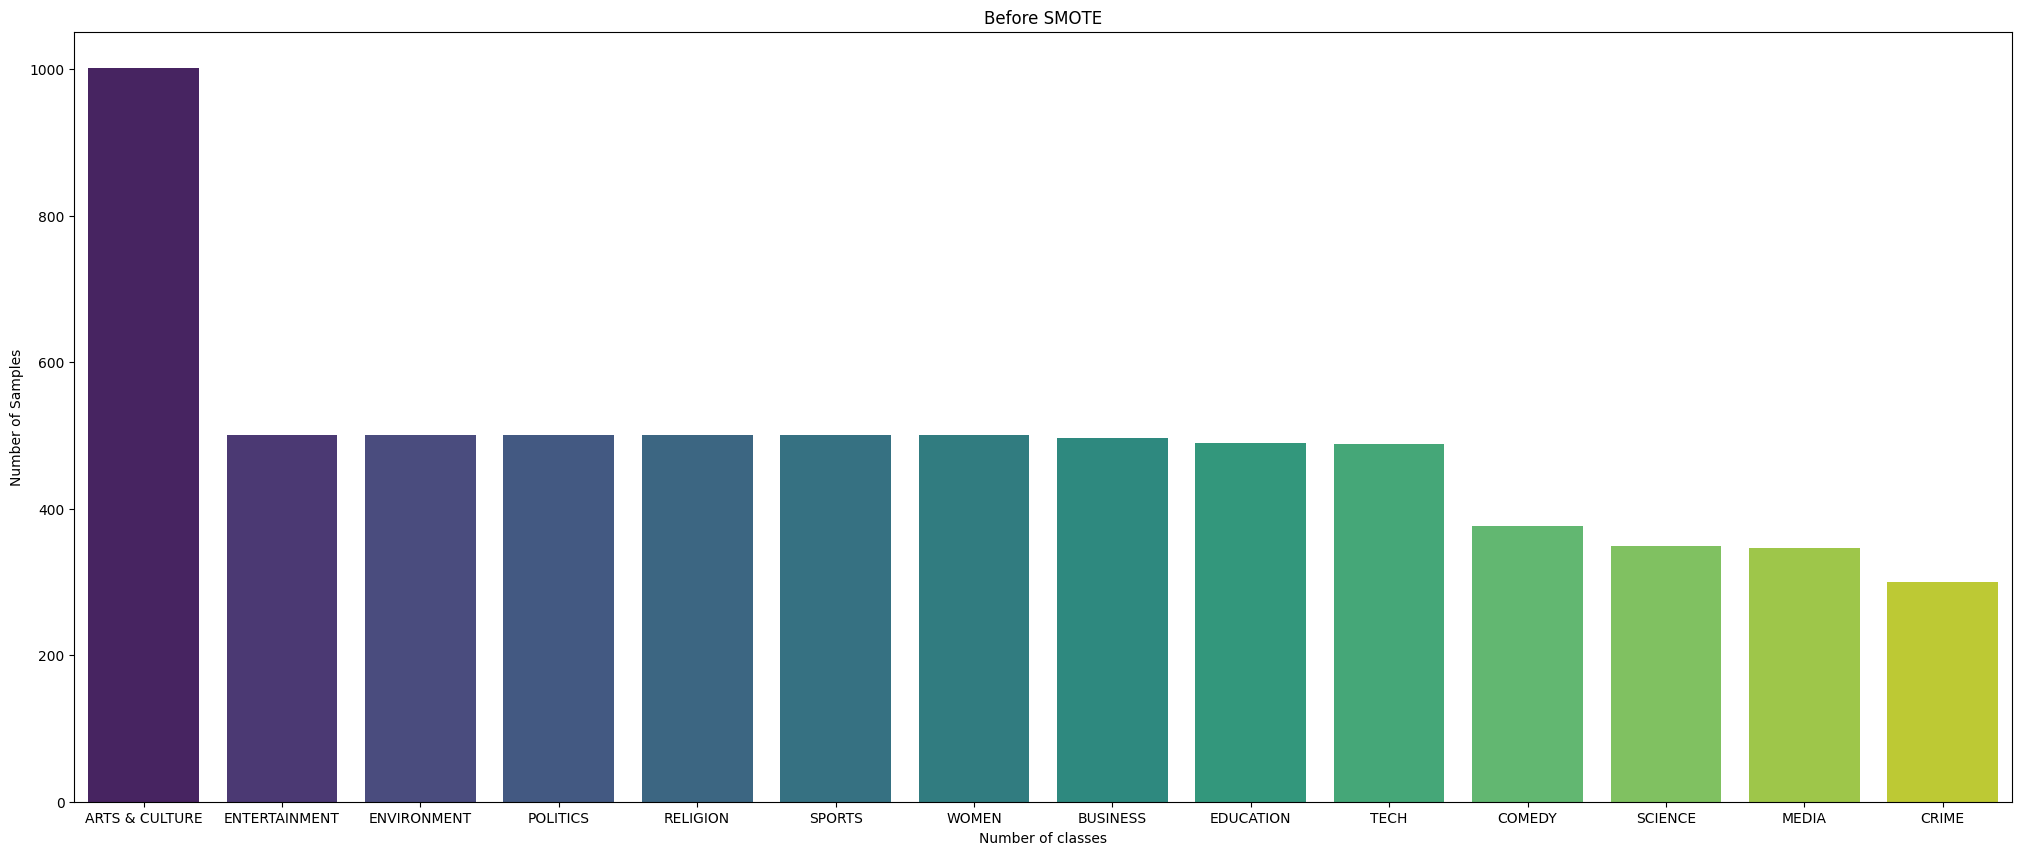

In [ ]:
class_counts = df['category'].value_counts()

plt.figure(figsize=(25, 10))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Before SMOTE')
plt.xlabel('Number of classes')
plt.ylabel('Number of Samples')
plt.show()

<ipython-input-57-f39773c2416e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


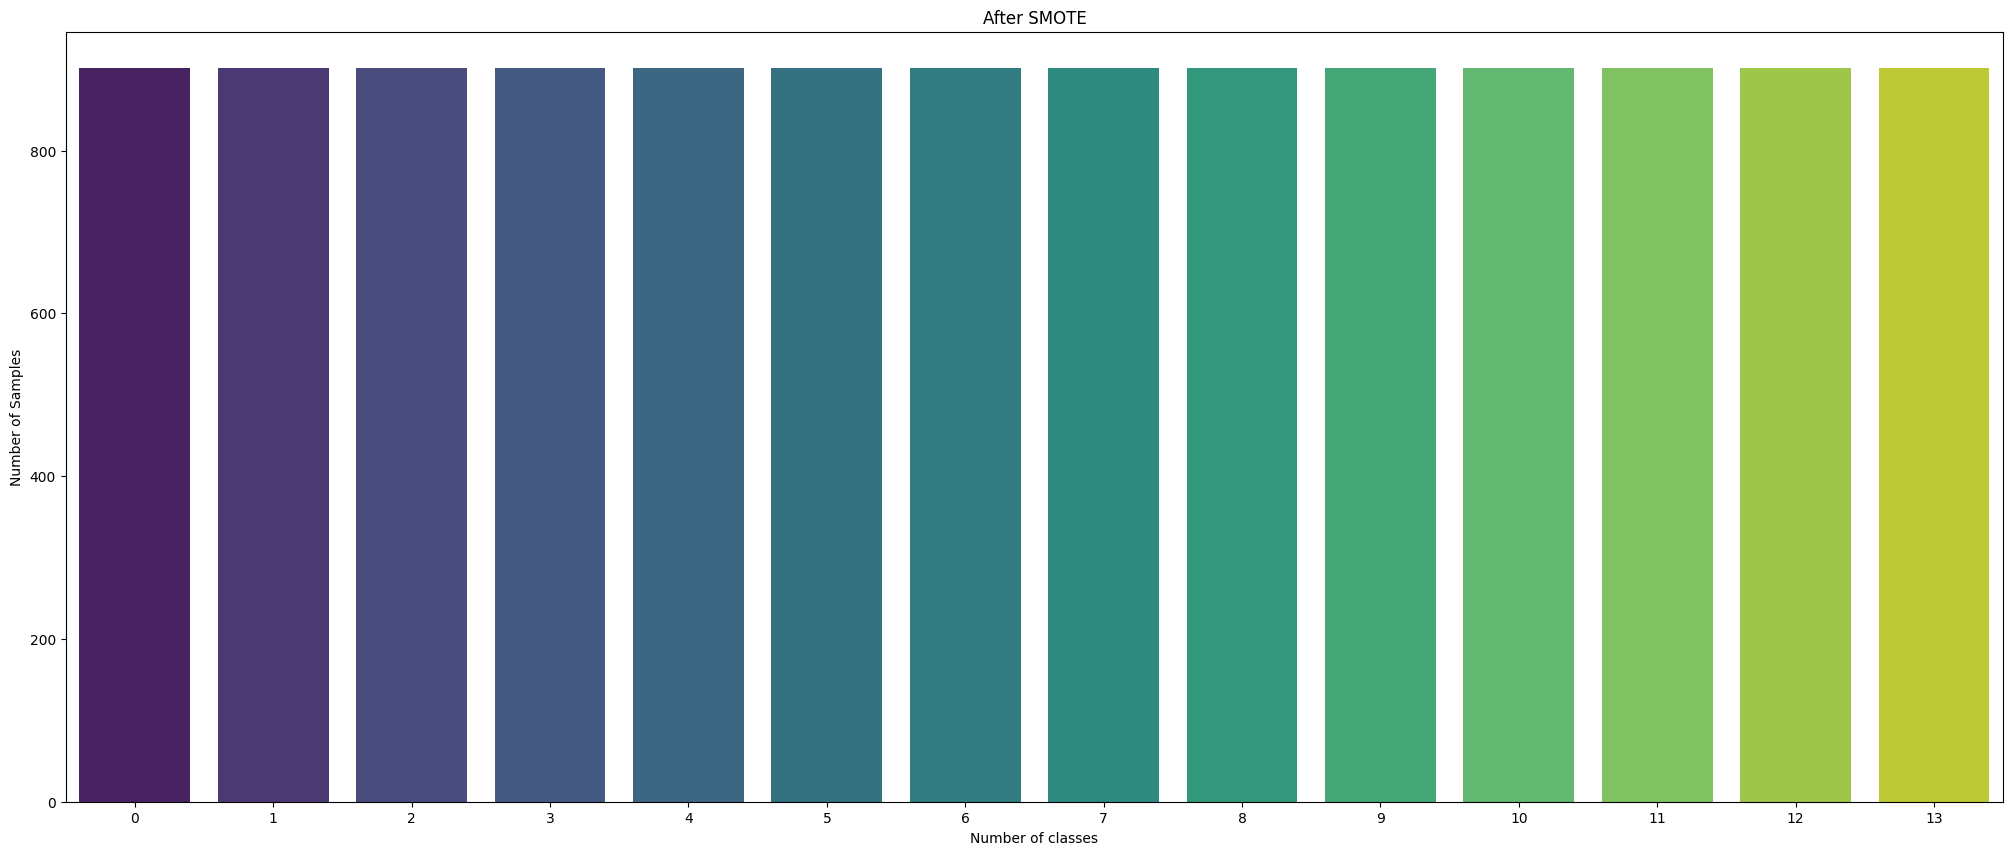

In [ ]:
# Impor library
from imblearn.over_sampling import SMOTE

# Ganti Random Over Sampling dengan SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Buat DataFrame baru
os = pd.DataFrame(list(zip([x[0] for x in X_resampled], y_resampled)), columns=['body', 'Label'])

# Tampilkan distribusi kelas setelah penerapan SMOTE
class_counts = os['Label'].value_counts()

plt.figure(figsize=(25, 10))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('After SMOTE')
plt.xlabel('Number of classes')
plt.ylabel('Number of Samples')
plt.show()

# **Model**

# **SVM**

Accuracy: 0.8192419825072886


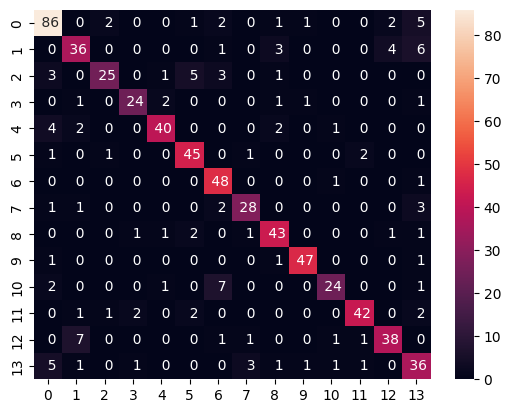

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       100
           1       0.73      0.72      0.73        50
           2       0.86      0.66      0.75        38
           3       0.86      0.80      0.83        30
           4       0.89      0.82      0.85        49
           5       0.82      0.90      0.86        50
           6       0.75      0.96      0.84        50
           7       0.82      0.80      0.81        35
           8       0.81      0.86      0.83        50
           9       0.94      0.94      0.94        50
          10       0.86      0.69      0.76        35
          11       0.91      0.84      0.87        50
          12       0.84      0.78      0.81        49
          13       0.63      0.72      0.67        50

    accuracy                           0.82       686
   macro avg       0.83      0.81      0.81       686
weighted avg       0.82      0.82      0.82       686



In [ ]:
# Eka Pramuditya
# Mengimpor library yang dibutuhkan
from sklearn.svm import SVC

# Membuat model
classifier = SVC(random_state=42)

# Pelatihan model
classifier.fit(X_resampled, y_resampled)

# Prediksi pada data pengujian (x_test)
y_pred = classifier.predict(x_test)

# Evaluasi model
SVM_ACCURACY = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

svm_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svm_cm, annot=True,fmt='3g')
plt.show()

print(classification_report(y_test, y_pred))

# **Stochastic Gradient Descent**

Accuracy: 0.8236151603498543


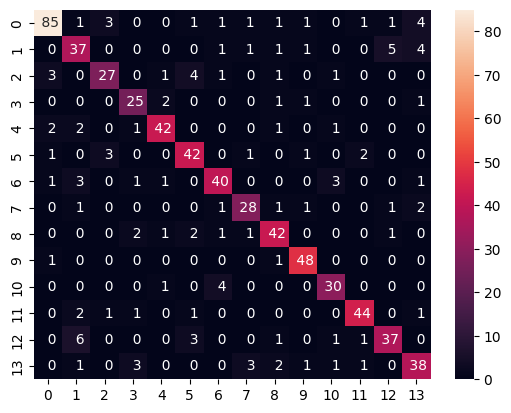

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.70      0.74      0.72        50
           2       0.79      0.71      0.75        38
           3       0.76      0.83      0.79        30
           4       0.88      0.86      0.87        49
           5       0.79      0.84      0.82        50
           6       0.82      0.80      0.81        50
           7       0.80      0.80      0.80        35
           8       0.81      0.84      0.82        50
           9       0.89      0.96      0.92        50
          10       0.81      0.86      0.83        35
          11       0.90      0.88      0.89        50
          12       0.82      0.76      0.79        49
          13       0.75      0.76      0.75        50

    accuracy                           0.82       686
   macro avg       0.82      0.82      0.82       686
weighted avg       0.83      0.82      0.82       686



In [ ]:
# Wahid Hidayat

from sklearn.linear_model import SGDClassifier # Mengimpor SGDClassifier

classifier = SGDClassifier(random_state=0) # Menggunakan SGDClassifier dengan random_state=0

classifier.fit(X_resampled, y_resampled) # Melatih model dengan data latih yang sudah di-resampling

# Prediksi pada data pengujian (x_test)
y_pred = classifier.predict(x_test) # Melakukan prediksi pada data pengujian

# Evaluasi model
SGD_ACCURACY = accuracy_score(y_test, y_pred) # Menghitung akurasi model
print("Accuracy:", accuracy_score(y_test, y_pred)) # Menampilkan akurasi model

SGD_cm = confusion_matrix(y_test, y_pred) # Menghitung confusion matrix
sns.heatmap(SGD_cm, annot=True,fmt='3g')
plt.show()

print("Classification Report:") # Menampilkan classification report
print(classification_report(y_test, y_pred)) # Menampilkan classification report dari model

# **Logistic Regression**

Accuracy: 0.8177842565597667


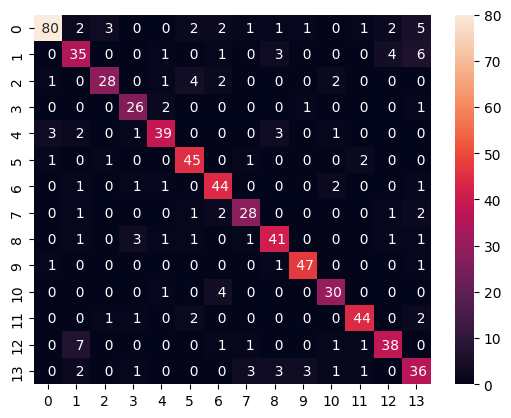

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       100
           1       0.69      0.70      0.69        50
           2       0.85      0.74      0.79        38
           3       0.79      0.87      0.83        30
           4       0.85      0.80      0.82        49
           5       0.82      0.90      0.86        50
           6       0.79      0.88      0.83        50
           7       0.80      0.80      0.80        35
           8       0.79      0.82      0.80        50
           9       0.90      0.94      0.92        50
          10       0.81      0.86      0.83        35
          11       0.90      0.88      0.89        50
          12       0.83      0.78      0.80        49
          13       0.65      0.72      0.69        50

    accuracy                           0.82       686
   macro avg       0.81      0.82      0.81       686
weighted avg       0.82      0.82      0.82       686



In [ ]:
# Angger Haryo Putranto
# Mengimpor library yang dibutuhkan
from sklearn.linear_model import LogisticRegression

# Membuat model
model = LogisticRegression(random_state=42, max_iter=200)

# Pelatihan model
model.fit(X_resampled, y_resampled)

# Prediksi pada data pengujian (x_test)
y_pred = model.predict(x_test)

# Evaluasi model
LR_ACCURACY = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

lr_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

print(classification_report(y_test, y_pred))

#**Ensemble Stacking Classifier With SVM, Decision Tree, and logistic regression**

In [ ]:
# # Farhan Husyen Ramadhan
# # Mengimpor library yang dibutuhkan
# from sklearn.ensemble import StackingClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression

# # Membuat model
# model1 = SVC(random_state=42)
# model2 = DecisionTreeClassifier(random_state=0)
# model3 = LogisticRegression(random_state=0)

# # Membuat StackingClassifier
# ensembleSC = StackingClassifier(estimators=[('svc', model1), ('dt', model2), ('lr', model3)], final_estimator=SVC())

# # Pelatihan model
# ensembleSC.fit(X_resampled, y_resampled)

# # Evaluasi model pada data pelatihan
# print(f"Akurasi training: {ensembleSC.score(x_train, y_train)}")

# # Evaluasi model pada data pengujian
# y_pred = ensembleSC.predict(x_test)
# print(f"Akurasi prediksi: {accuracy_score(y_test, y_pred)}")
# print(classification_report(y_test, y_pred))